Verilerin bulunduğu dosyayı yüklenmesi

In [ ]:
from google.colab import files

files.upload();

Yüklenen rar dosyasını ayıklanması

In [ ]:
!unrar x DM_dataset_hw1.rar

Sabitlerin tanımlanması

In [ ]:
# Tüm verilerin bulunduğu klasör
dataset_path = '/content/DM_dataset_hw1/'

# Sınıfların isimleri
classes = ['battery', 'dc_volt_src', 'diode', 'gnd', 'inductor', 'resistor', 'voltmeter']

# İstenen görsel boyutu
size = (28, 28)

# Dimension sayısı
dimension_count = size[0] * size[1]

Her sınıf içerisindeki dosya sayısının kontrolü

In [ ]:
import os

for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_path):
        print(f"Sınıf: {class_name}")
        file_count = len(os.listdir(class_path))
        print(f"Toplam dosya sayısı: {file_count}")
        print("---------------------------")

Sınıf: battery
Toplam dosya sayısı: 200
---------------------------
Sınıf: dc_volt_src
Toplam dosya sayısı: 199
---------------------------
Sınıf: diode
Toplam dosya sayısı: 200
---------------------------
Sınıf: gnd
Toplam dosya sayısı: 182
---------------------------
Sınıf: inductor
Toplam dosya sayısı: 194
---------------------------
Sınıf: resistor
Toplam dosya sayısı: 188
---------------------------
Sınıf: voltmeter
Toplam dosya sayısı: 200
---------------------------


Kontrol amaçlı görselin ekrana bastırılmasını sağlayan fonksiyon

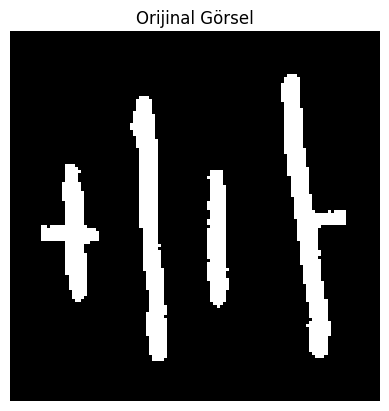

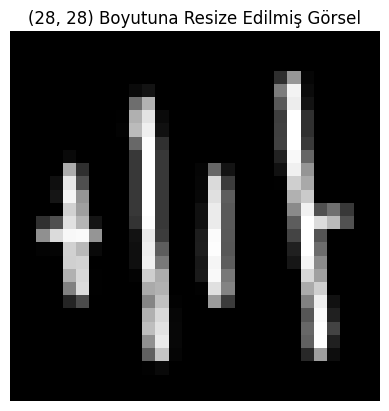

In [ ]:
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import os

# Verilen resmi verilen boyutta gösterir
def show_image(image, target_size=None):
    if target_size:
        # Görüntüyü belirtilen boyuta resize et
        resized_image = image.resize(target_size)

        # Resize edilmiş görselin ekrana bastırılması
        plt.imshow(resized_image, cmap='gray')
        plt.title(f"{target_size} Boyutuna Resize Edilmiş Görsel")
    else:
        # Orijinal görselin ekrana bastırılması
        plt.imshow(image, cmap='gray')
        plt.title("Orijinal Görsel")

    plt.axis('off')
    plt.show()

# Örnek kullanım
img = Image.open('/content/DM_dataset_hw1/battery/1.bmp')
show_image(img) # Orijinal görsel
show_image(img, target_size=size) # Resize edilen görsel

Tüm görsellerin 28x28'e resize edilip tek boyutlu vektöre dönüştürülüp normalize edilip all_images'e ve görsellerin sınıflarının all_classes'a eklenmesi

In [ ]:
from PIL import Image
import os
import numpy as np

# Görselleri resize edip normalize edip tek boyutlu vektöre dönüştürüp döndürür
def normalize_image(image_path):
    img = Image.open(image_path)
    # Görselin modu RGB ise grayscale'e dönüştür
    if(img.mode == "RGB"):
      img = img.convert("L")

    img = img.resize(size)
    img_array = np.array(img) / 255.0
    img_array = (img_array > 0.2).astype(int)
    img_vector = img_array.flatten()

    return img_vector

# Tüm görsellerin bulunduğu dizi
all_images = []
# Görsellerin sınıflarının bulunduğu dizi
all_classes = []

# Tüm sınıflar için normalize edilmiş görselleri yükle
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    for filename in os.listdir(class_path):
        if filename.endswith(".bmp"):
            img_path = os.path.join(class_path, filename)
            normalized_image = normalize_image(img_path)
            all_images.append(normalized_image)
            all_classes.append(class_name)

# Örnek
print(all_images[1])
print(all_classes[1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

Tüm görsellerin boyutlarının kontrolü

In [ ]:
# Tüm görsellerin doğru boyutta olup olmadığının kontrolü
for class_name in classes:
    print(f"Sınıf: {class_name}")
    class_indices = [i for i, c in enumerate(all_classes) if c == class_name]
    class_images = [all_images[i] for i in class_indices]

    invalid_dimensions = [len(img_vector) for img_vector in class_images if len(img_vector) != dimension_count]

    if invalid_dimensions:
        print(f"Boyutu {dimension_count} olmayan görsellerin boyutları: {invalid_dimensions}")
    else:
        print(f"Tüm görsellerin boyutu {dimension_count}.")

    print("----------------------------")

Sınıf: battery
Tüm görsellerin boyutu 784.
----------------------------
Sınıf: dc_volt_src
Tüm görsellerin boyutu 784.
----------------------------
Sınıf: diode
Tüm görsellerin boyutu 784.
----------------------------
Sınıf: gnd
Tüm görsellerin boyutu 784.
----------------------------
Sınıf: inductor
Tüm görsellerin boyutu 784.
----------------------------
Sınıf: resistor
Tüm görsellerin boyutu 784.
----------------------------
Sınıf: voltmeter
Tüm görsellerin boyutu 784.
----------------------------


Normalize edilen görselin kontrol amaçlı ekrana bastırılmasını sağlayan fonksiyon

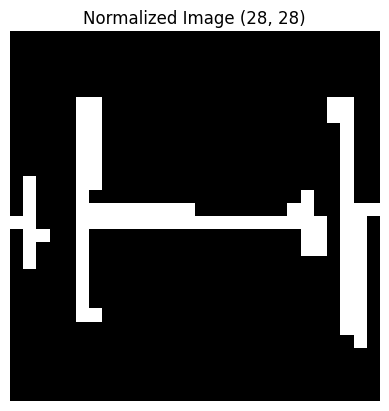

In [ ]:
# Verilen tek boyutlu görseli size boyutunda ekrana bastırır
def show_normalized_image(image_array):
    # Tek boyutlu vektörü size boyutunda diziye dönüştürme
    reshaped_image = image_array.reshape(size)

    # Dizinin ekrana görsel olarak bastırılması
    plt.imshow(reshaped_image, cmap='gray')
    plt.title(f"Normalized Image {size}")
    plt.axis('off')
    plt.show()

# Örnek
show_normalized_image(all_images[0])

5-Fold

In [ ]:
from sklearn.model_selection import KFold

# 5-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=50)

KNN-3 Euclid

K=3, Metric=Euclid
--------------------------------------------------------------------------------------------------------------------------------------

Kfold 1


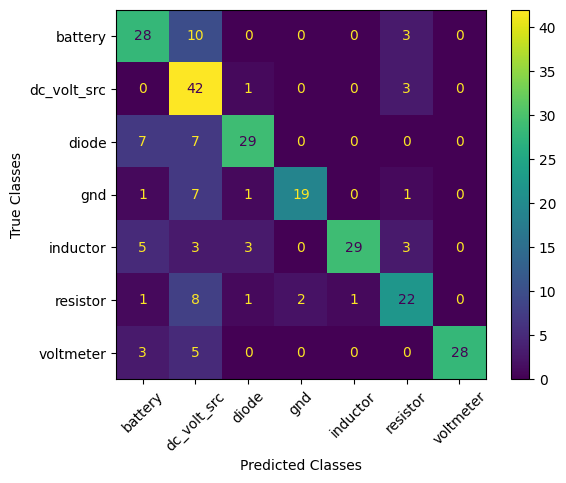

Accuracy:  0.7216117216117216
F-measure:  0.7338913571632959
Precision:  0.7888453348819203
Recall:  0.7151898767105426
Training Time:  0.0015225410461425781
Test Time:  0.07058882713317871





Kfold 2


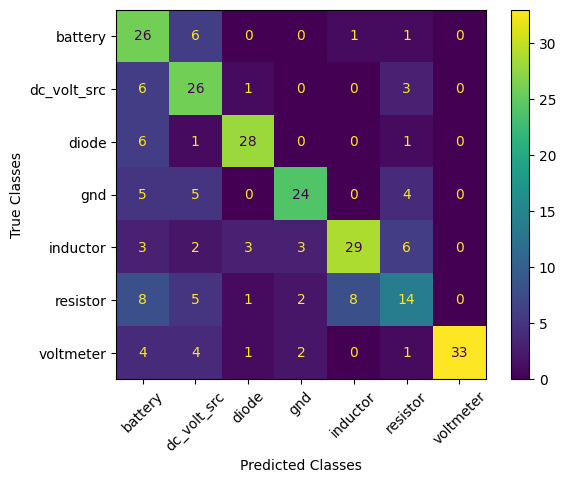

Accuracy:  0.6593406593406593
F-measure:  0.6601470019445905
Precision:  0.6866336612174623
Recall:  0.6612105711849957
Training Time:  0.0014379024505615234
Test Time:  0.07504987716674805





Kfold 3


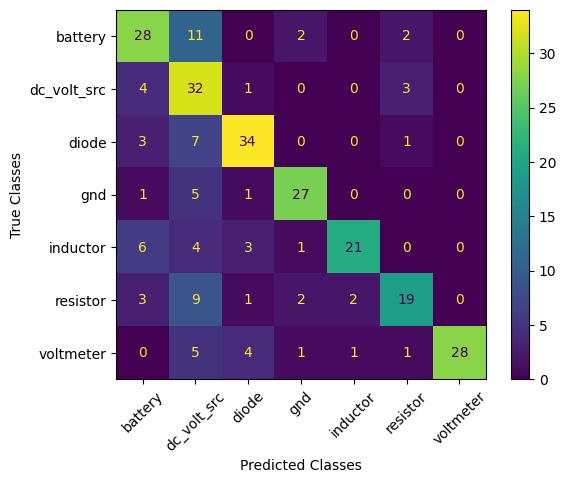

Accuracy:  0.6923076923076923
F-measure:  0.7030067793149056
Precision:  0.751036672612015
Recall:  0.6898019672985474
Training Time:  0.0010709762573242188
Test Time:  0.04514789581298828





Kfold 4


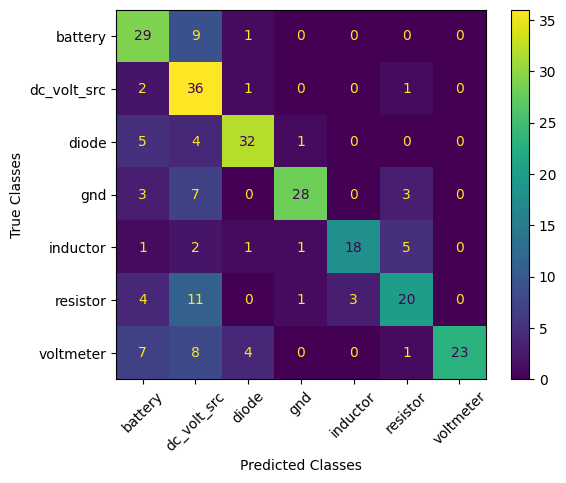

Accuracy:  0.6838235294117647
F-measure:  0.6913005734064592
Precision:  0.7548154384695452
Recall:  0.6827118159100981
Training Time:  0.0009002685546875
Test Time:  0.04449105262756348





Kfold 5


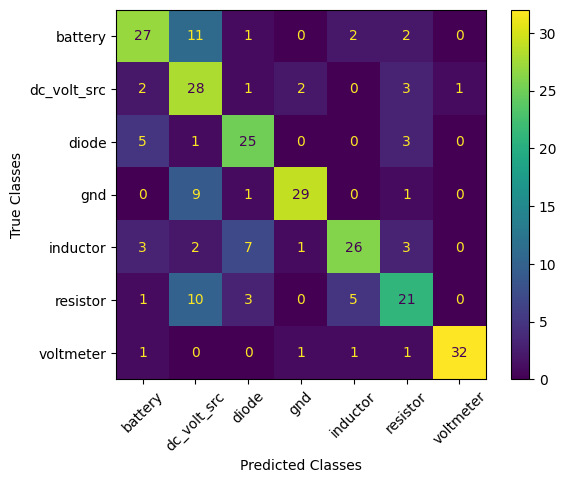

Accuracy:  0.6911764705882353
F-measure:  0.6997492107073556
Precision:  0.72000808746482
Recall:  0.696842051297787
Training Time:  0.0009169578552246094
Test Time:  0.04388570785522461





--------------------------------------------------------------------------------------------------------------------------------------
Average Accuracy:  0.6896520146520146
Average F-measure:  0.6976189845073214
Average Precision:  0.7402678389291525
Average Recall:  0.6891512564803942
Average Training Time:  0.001169729232788086
Average Test Time:  0.05583267211914063
--------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

avg_accuracy = 0
avg_f_measure = 0
avg_precision = 0
avg_recall = 0
avg_training_time = 0
avg_test_time = 0

print("K=3, Metric=Euclid")
print('--------------------------------------------------------------------------------------------------------------------------------------\n')
i = 1
for train, test in kf.split(all_images):
  print(f'Kfold {i}')
  i += 1
  # Training ve test kümeleri
  train_images, train_classes = np.array(all_images)[train], np.array(all_classes)[train]
  test_images, test_classes = np.array(all_images)[test], np.array(all_classes)[test]

  knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

  start_time = time.time()
  knn.fit(train_images, train_classes)
  training_time = time.time() - start_time

  start_time = time.time()
  predictions = knn.predict(test_images)
  test_time = time.time() - start_time

  # Karmaşıklık matrisinin çizimi
  cm = metrics.confusion_matrix(test_classes, predictions)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  cm_display.plot()
  plt.xticks(rotation=45)
  plt.xlabel('Predicted Classes')
  plt.ylabel('True Classes')
  plt.show()

  accuracy = metrics.accuracy_score(test_classes, predictions)
  f_measure = metrics.f1_score(test_classes, predictions, average='macro')
  precision = metrics.precision_score(test_classes, predictions, average='macro')
  recall = metrics.recall_score(test_classes, predictions, average='macro')

  avg_accuracy += accuracy
  avg_f_measure += f_measure
  avg_precision += precision
  avg_recall += recall
  avg_training_time += training_time
  avg_test_time += test_time

  print("Accuracy: ", accuracy)
  print("F-measure: ", f_measure)
  print("Precision: ", precision)
  print("Recall: ", recall)
  print("Training Time: ", training_time)
  print("Test Time: ", test_time)

  print("\n\n\n\n")

avg_accuracy /= kf.n_splits
avg_f_measure /= kf.n_splits
avg_precision /= kf.n_splits
avg_recall /= kf.n_splits
avg_training_time /= kf.n_splits
avg_test_time /= kf.n_splits

print('--------------------------------------------------------------------------------------------------------------------------------------')
print("Average Accuracy: ", avg_accuracy)
print("Average F-measure: ", avg_f_measure)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print("Average Training Time: ", avg_training_time)
print("Average Test Time: ", avg_test_time)
print('--------------------------------------------------------------------------------------------------------------------------------------')

Knn-5 Euclid

K=5, Metric=Euclid
--------------------------------------------------------------------------------------------------------------------------------------

Kfold 1


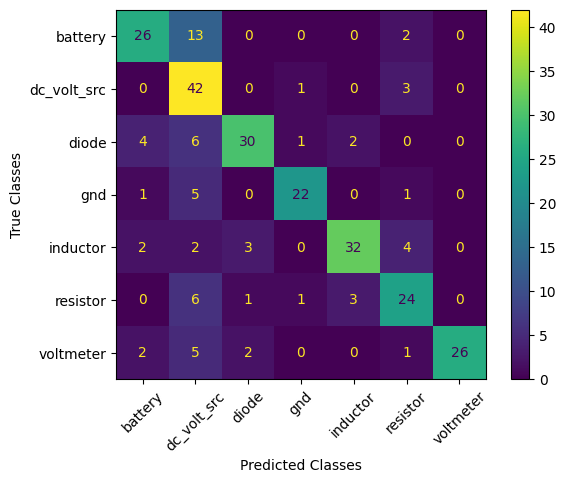

Accuracy:  0.73992673992674
F-measure:  0.7507061393071888
Precision:  0.79120217091284
Recall:  0.7365153546331776
Training Time:  0.001058340072631836
Test Time:  0.048006534576416016





Kfold 2


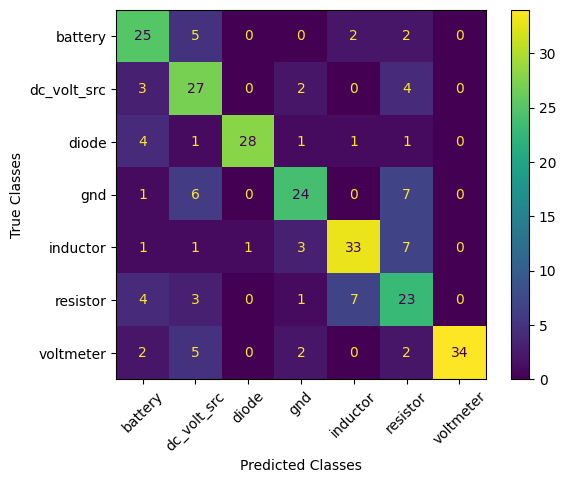

Accuracy:  0.7106227106227107
F-measure:  0.715154170442464
Precision:  0.7353902613024506
Recall:  0.7104086943701967
Training Time:  0.0012485980987548828
Test Time:  0.047173500061035156





Kfold 3


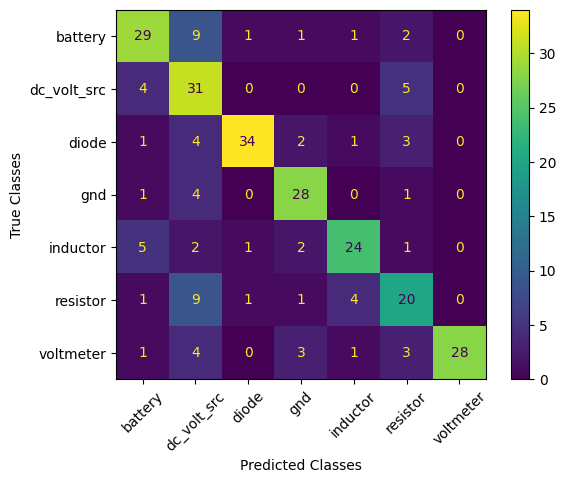

Accuracy:  0.7106227106227107
F-measure:  0.7166396852179976
Precision:  0.7434053540044323
Recall:  0.7099676304630379
Training Time:  0.0009179115295410156
Test Time:  0.04848527908325195





Kfold 4


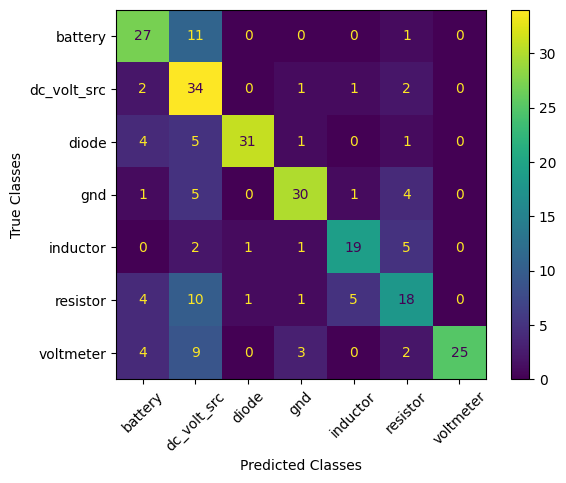

Accuracy:  0.6764705882352942
F-measure:  0.6839669743523699
Precision:  0.730950584334043
Recall:  0.676230783774743
Training Time:  0.0009288787841796875
Test Time:  0.048424482345581055





Kfold 5


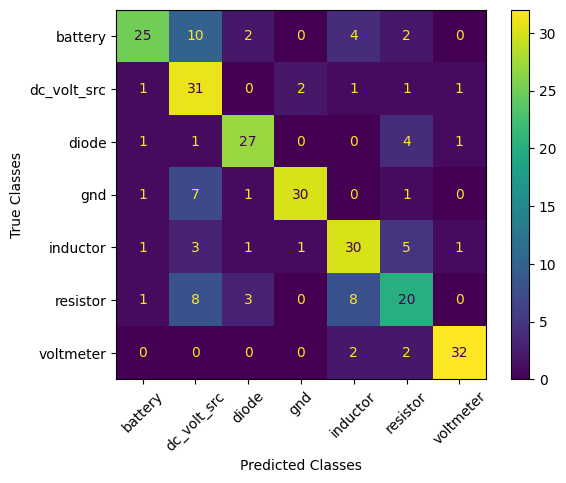

Accuracy:  0.7169117647058824
F-measure:  0.7235055966158039
Precision:  0.7436556440758121
Recall:  0.723789348129782
Training Time:  0.0010650157928466797
Test Time:  0.04900932312011719





--------------------------------------------------------------------------------------------------------------------------------------
Average Accuracy:  0.7109109028226677
Average F-measure:  0.7179945131871648
Average Precision:  0.7489208029259157
Average Recall:  0.7113823622741874
Average Training Time:  0.0010437488555908204
Average Test Time:  0.048219823837280275
--------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

avg_accuracy = 0
avg_f_measure = 0
avg_precision = 0
avg_recall = 0
avg_training_time = 0
avg_test_time = 0

print("K=5, Metric=Euclid")
print('--------------------------------------------------------------------------------------------------------------------------------------\n')
i = 1
for train, test in kf.split(all_images):
  print(f'Kfold {i}')
  i += 1
  # Training ve test kümeleri
  train_images, train_classes = np.array(all_images)[train], np.array(all_classes)[train]
  test_images, test_classes = np.array(all_images)[test], np.array(all_classes)[test]

  knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

  start_time = time.time()
  knn.fit(train_images, train_classes)
  training_time = time.time() - start_time

  start_time = time.time()
  predictions = knn.predict(test_images)
  test_time = time.time() - start_time

  # Karmaşıklık matrisinin çizimi
  cm = metrics.confusion_matrix(test_classes, predictions)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  cm_display.plot()
  plt.xticks(rotation=45)
  plt.xlabel('Predicted Classes')
  plt.ylabel('True Classes')
  plt.show()

  accuracy = metrics.accuracy_score(test_classes, predictions)
  f_measure = metrics.f1_score(test_classes, predictions, average='macro')
  precision = metrics.precision_score(test_classes, predictions, average='macro')
  recall = metrics.recall_score(test_classes, predictions, average='macro')

  avg_accuracy += accuracy
  avg_f_measure += f_measure
  avg_precision += precision
  avg_recall += recall
  avg_training_time += training_time
  avg_test_time += test_time

  print("Accuracy: ", accuracy)
  print("F-measure: ", f_measure)
  print("Precision: ", precision)
  print("Recall: ", recall)
  print("Training Time: ", training_time)
  print("Test Time: ", test_time)

  print("\n\n\n\n")

avg_accuracy /= kf.n_splits
avg_f_measure /= kf.n_splits
avg_precision /= kf.n_splits
avg_recall /= kf.n_splits
avg_training_time /= kf.n_splits
avg_test_time /= kf.n_splits

print('--------------------------------------------------------------------------------------------------------------------------------------')
print("Average Accuracy: ", avg_accuracy)
print("Average F-measure: ", avg_f_measure)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print("Average Training Time: ", avg_training_time)
print("Average Test Time: ", avg_test_time)
print('--------------------------------------------------------------------------------------------------------------------------------------')

Knn-7 Euclid

K=7, Metric=Euclid
--------------------------------------------------------------------------------------------------------------------------------------

Kfold 1


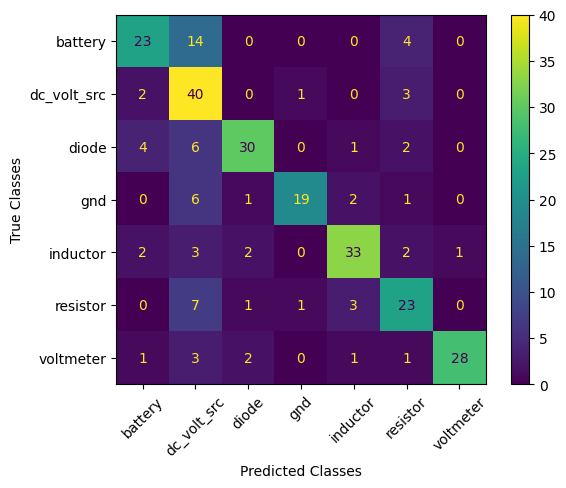

Accuracy:  0.717948717948718
F-measure:  0.7277481665087336
Precision:  0.770368640326784
Recall:  0.7122500221329868
Training Time:  0.0013773441314697266
Test Time:  0.09164953231811523





Kfold 2


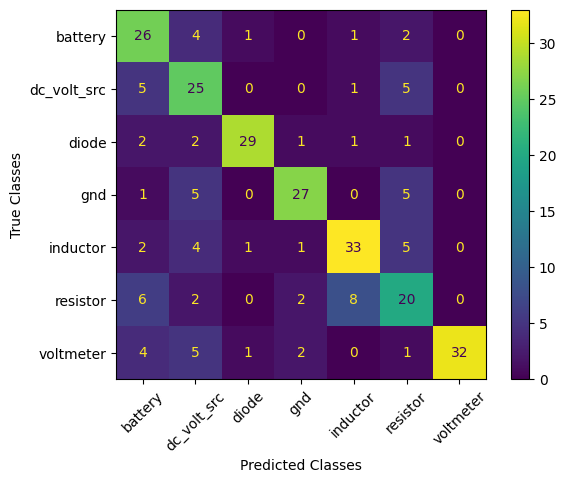

Accuracy:  0.7032967032967034
F-measure:  0.7071281256127399
Precision:  0.7263406594176713
Recall:  0.7042929147250051
Training Time:  0.001333475112915039
Test Time:  0.07102656364440918





Kfold 3


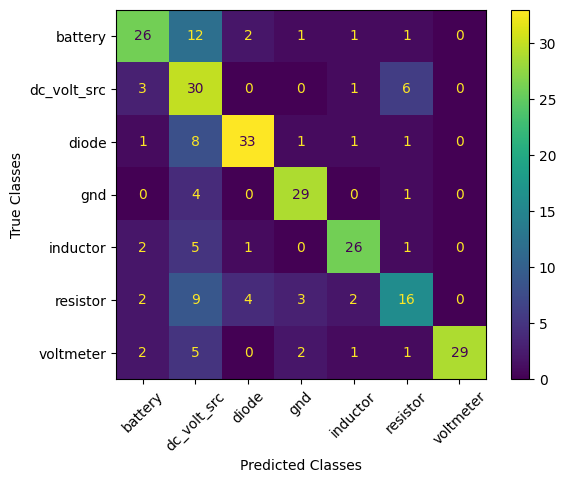

Accuracy:  0.6923076923076923
F-measure:  0.7026969910431332
Precision:  0.7384041820685656
Recall:  0.6933181799851723
Training Time:  0.0012655258178710938
Test Time:  0.07128620147705078





Kfold 4


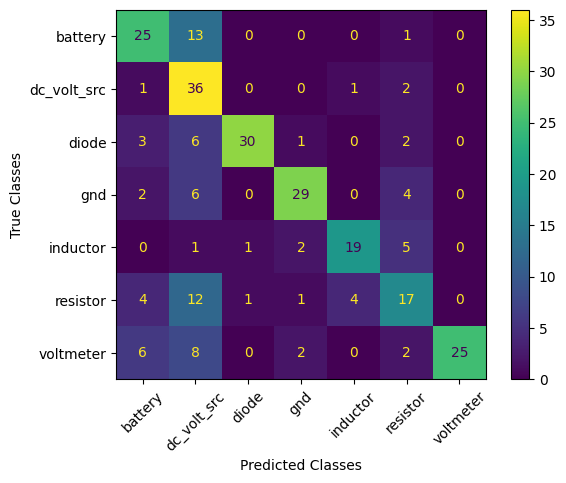

Accuracy:  0.6654411764705882
F-measure:  0.6753454586589135
Precision:  0.731667156884927
Recall:  0.6654989488268802
Training Time:  0.0013446807861328125
Test Time:  0.07459115982055664





Kfold 5


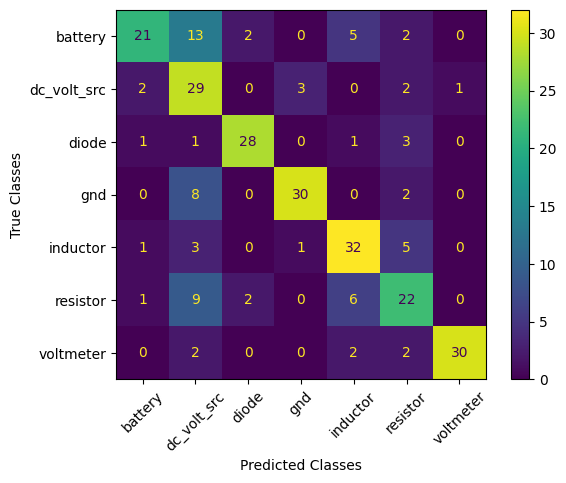

Accuracy:  0.7058823529411765
F-measure:  0.7176452059835653
Precision:  0.7505057961200844
Recall:  0.7129890548299772
Training Time:  0.0012798309326171875
Test Time:  0.08635115623474121





--------------------------------------------------------------------------------------------------------------------------------------
Average Accuracy:  0.6969753285929757
Average F-measure:  0.7061127895614171
Average Precision:  0.7434572869636065
Average Recall:  0.6976698241000043
Average Training Time:  0.0013201713562011718
Average Test Time:  0.07898092269897461
--------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

avg_accuracy = 0
avg_f_measure = 0
avg_precision = 0
avg_recall = 0
avg_training_time = 0
avg_test_time = 0

print("K=7, Metric=Euclid")
print('--------------------------------------------------------------------------------------------------------------------------------------\n')
i = 1
for train, test in kf.split(all_images):
  print(f'Kfold {i}')
  i += 1
  # Training ve test kümeleri
  train_images, train_classes = np.array(all_images)[train], np.array(all_classes)[train]
  test_images, test_classes = np.array(all_images)[test], np.array(all_classes)[test]

  knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')

  start_time = time.time()
  knn.fit(train_images, train_classes)
  training_time = time.time() - start_time

  start_time = time.time()
  predictions = knn.predict(test_images)
  test_time = time.time() - start_time

  # Karmaşıklık matrisinin çizimi
  cm = metrics.confusion_matrix(test_classes, predictions)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  cm_display.plot()
  plt.xticks(rotation=45)
  plt.xlabel('Predicted Classes')
  plt.ylabel('True Classes')
  plt.show()

  accuracy = metrics.accuracy_score(test_classes, predictions)
  f_measure = metrics.f1_score(test_classes, predictions, average='macro')
  precision = metrics.precision_score(test_classes, predictions, average='macro')
  recall = metrics.recall_score(test_classes, predictions, average='macro')

  avg_accuracy += accuracy
  avg_f_measure += f_measure
  avg_precision += precision
  avg_recall += recall
  avg_training_time += training_time
  avg_test_time += test_time

  print("Accuracy: ", accuracy)
  print("F-measure: ", f_measure)
  print("Precision: ", precision)
  print("Recall: ", recall)
  print("Training Time: ", training_time)
  print("Test Time: ", test_time)

  print("\n\n\n\n")

avg_accuracy /= kf.n_splits
avg_f_measure /= kf.n_splits
avg_precision /= kf.n_splits
avg_recall /= kf.n_splits
avg_training_time /= kf.n_splits
avg_test_time /= kf.n_splits

print('--------------------------------------------------------------------------------------------------------------------------------------')
print("Average Accuracy: ", avg_accuracy)
print("Average F-measure: ", avg_f_measure)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print("Average Training Time: ", avg_training_time)
print("Average Test Time: ", avg_test_time)
print('--------------------------------------------------------------------------------------------------------------------------------------')

Knn-3 Cosine

K=3, Metric=Cosine
--------------------------------------------------------------------------------------------------------------------------------------

Kfold 1


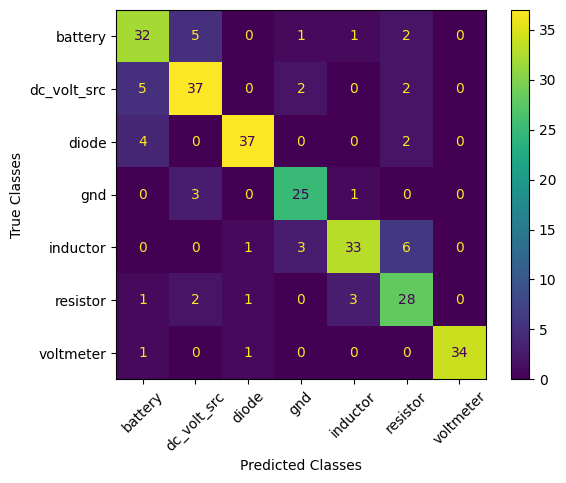

Accuracy:  0.8278388278388278
F-measure:  0.8307733339913675
Precision:  0.8330418220856606
Recall:  0.8313222882386967
Training Time:  0.0010066032409667969
Test Time:  0.05900716781616211





Kfold 2


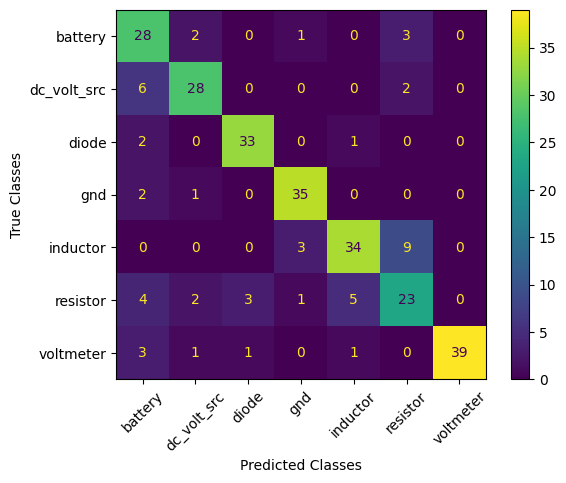

Accuracy:  0.8058608058608059
F-measure:  0.8048457433253893
Precision:  0.8090762057404813
Recall:  0.8071552495903015
Training Time:  0.0008959770202636719
Test Time:  0.04926490783691406





Kfold 3


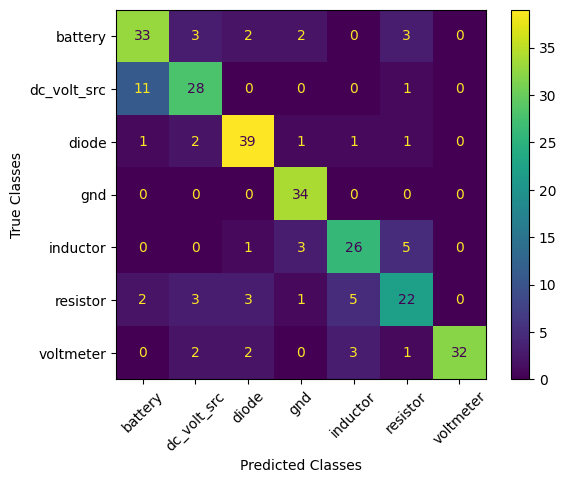

Accuracy:  0.7838827838827839
F-measure:  0.7821717137245088
Precision:  0.7867927287267023
Recall:  0.7840109687285767
Training Time:  0.0008940696716308594
Test Time:  0.05309605598449707





Kfold 4


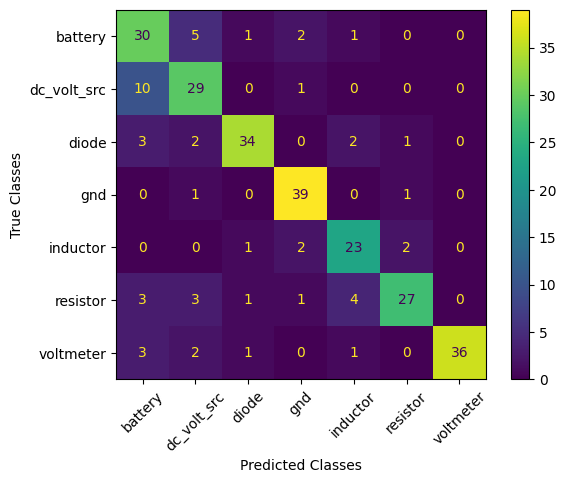

Accuracy:  0.8014705882352942
F-measure:  0.8012277132308537
Precision:  0.8110039747162509
Recall:  0.8008456652873637
Training Time:  0.0009279251098632812
Test Time:  0.049180030822753906





Kfold 5


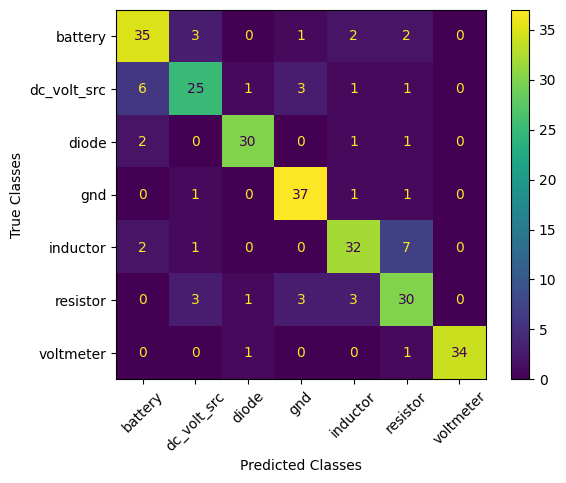

Accuracy:  0.8198529411764706
F-measure:  0.8230032816177175
Precision:  0.8261468505654552
Recall:  0.8219044730819208
Training Time:  0.0009965896606445312
Test Time:  0.0498507022857666





--------------------------------------------------------------------------------------------------------------------------------------
Average Accuracy:  0.8077811893988365
Average F-measure:  0.8084043571779673
Average Precision:  0.8132123163669099
Average Recall:  0.8090477289853719
Average Training Time:  0.0009442329406738281
Average Test Time:  0.05207977294921875
--------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

avg_accuracy = 0
avg_f_measure = 0
avg_precision = 0
avg_recall = 0
avg_training_time = 0
avg_test_time = 0

print("K=3, Metric=Cosine")
print('--------------------------------------------------------------------------------------------------------------------------------------\n')
i = 1
for train, test in kf.split(all_images):
  print(f'Kfold {i}')
  i += 1
  # Training ve test kümeleri
  train_images, train_classes = np.array(all_images)[train], np.array(all_classes)[train]
  test_images, test_classes = np.array(all_images)[test], np.array(all_classes)[test]

  knn = KNeighborsClassifier(n_neighbors=3, metric='cosine')

  start_time = time.time()
  knn.fit(train_images, train_classes)
  training_time = time.time() - start_time

  start_time = time.time()
  predictions = knn.predict(test_images)
  test_time = time.time() - start_time

  # Karmaşıklık matrisinin çizimi
  cm = metrics.confusion_matrix(test_classes, predictions)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  cm_display.plot()
  plt.xticks(rotation=45)
  plt.xlabel('Predicted Classes')
  plt.ylabel('True Classes')
  plt.show()

  accuracy = metrics.accuracy_score(test_classes, predictions)
  f_measure = metrics.f1_score(test_classes, predictions, average='macro')
  precision = metrics.precision_score(test_classes, predictions, average='macro')
  recall = metrics.recall_score(test_classes, predictions, average='macro')

  avg_accuracy += accuracy
  avg_f_measure += f_measure
  avg_precision += precision
  avg_recall += recall
  avg_training_time += training_time
  avg_test_time += test_time

  print("Accuracy: ", accuracy)
  print("F-measure: ", f_measure)
  print("Precision: ", precision)
  print("Recall: ", recall)
  print("Training Time: ", training_time)
  print("Test Time: ", test_time)

  print("\n\n\n\n")

avg_accuracy /= kf.n_splits
avg_f_measure /= kf.n_splits
avg_precision /= kf.n_splits
avg_recall /= kf.n_splits
avg_training_time /= kf.n_splits
avg_test_time /= kf.n_splits

print('--------------------------------------------------------------------------------------------------------------------------------------')
print("Average Accuracy: ", avg_accuracy)
print("Average F-measure: ", avg_f_measure)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print("Average Training Time: ", avg_training_time)
print("Average Test Time: ", avg_test_time)
print('--------------------------------------------------------------------------------------------------------------------------------------')

Knn-5 Cosine

K=5, Metric=Cosine
--------------------------------------------------------------------------------------------------------------------------------------

Kfold 1


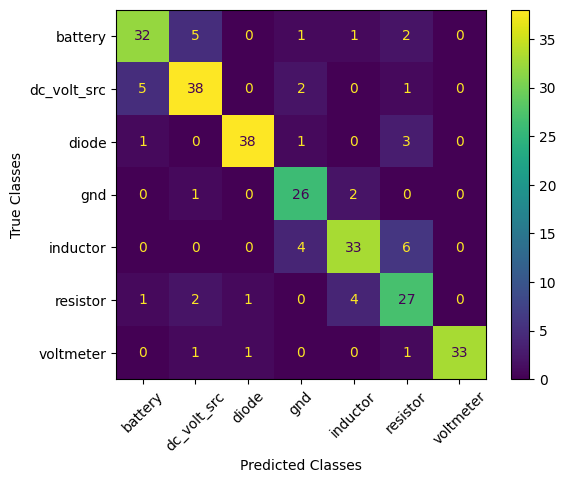

Accuracy:  0.8315018315018315
F-measure:  0.8328523198709291
Precision:  0.8348184773090905
Recall:  0.8346263591900902
Training Time:  0.0009703636169433594
Test Time:  0.05280780792236328





Kfold 2


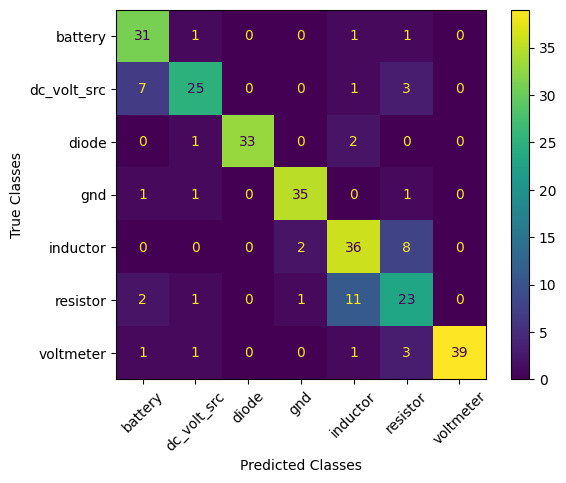

Accuracy:  0.8131868131868132
F-measure:  0.8159439293563425
Precision:  0.8249332121512573
Recall:  0.81406670982657
Training Time:  0.0013854503631591797
Test Time:  0.09462833404541016





Kfold 3


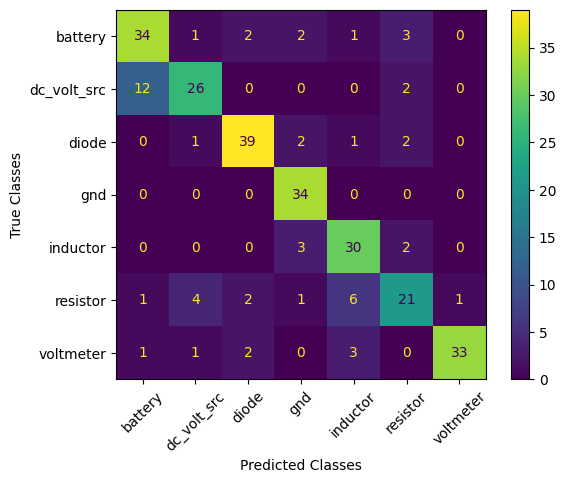

Accuracy:  0.7948717948717948
F-measure:  0.7912448908020028
Precision:  0.7963854499671266
Recall:  0.7961200759373517
Training Time:  0.0014278888702392578
Test Time:  0.06744933128356934





Kfold 4


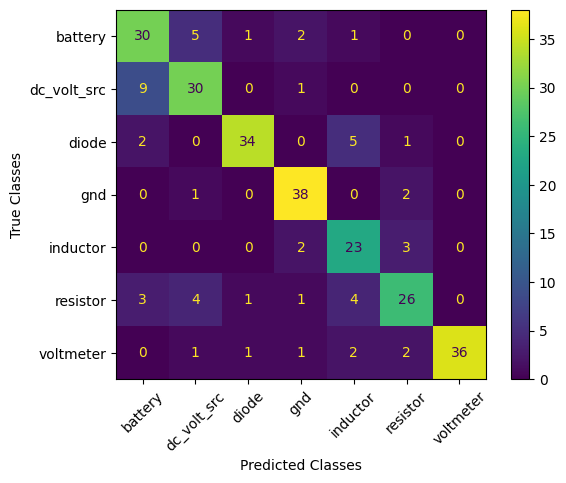

Accuracy:  0.7977941176470589
F-measure:  0.7945703761792221
Precision:  0.7998196573929306
Recall:  0.7972697696382972
Training Time:  0.0013251304626464844
Test Time:  0.08872270584106445





Kfold 5


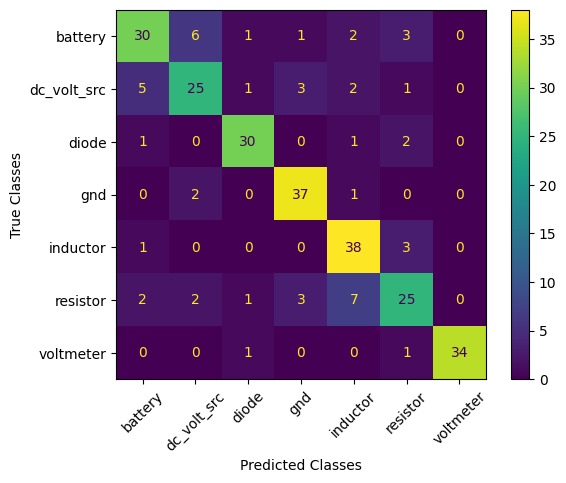

Accuracy:  0.8051470588235294
F-measure:  0.8063938032595678
Precision:  0.8094517527290636
Recall:  0.8078441978090211
Training Time:  0.004568815231323242
Test Time:  0.07552337646484375





--------------------------------------------------------------------------------------------------------------------------------------
Average Accuracy:  0.8085003232062056
Average F-measure:  0.8082010638936129
Average Precision:  0.8130817099098937
Average Recall:  0.8099854224802661
Average Training Time:  0.0019355297088623046
Average Test Time:  0.07582631111145019
--------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

avg_accuracy = 0
avg_f_measure = 0
avg_precision = 0
avg_recall = 0
avg_training_time = 0
avg_test_time = 0

print("K=5, Metric=Cosine")
print('--------------------------------------------------------------------------------------------------------------------------------------\n')
i = 1
for train, test in kf.split(all_images):
  print(f'Kfold {i}')
  i += 1
  # Training ve test kümeleri
  train_images, train_classes = np.array(all_images)[train], np.array(all_classes)[train]
  test_images, test_classes = np.array(all_images)[test], np.array(all_classes)[test]

  knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')

  start_time = time.time()
  knn.fit(train_images, train_classes)
  training_time = time.time() - start_time

  start_time = time.time()
  predictions = knn.predict(test_images)
  test_time = time.time() - start_time

  # Karmaşıklık matrisinin çizimi
  cm = metrics.confusion_matrix(test_classes, predictions)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  cm_display.plot()
  plt.xticks(rotation=45)
  plt.xlabel('Predicted Classes')
  plt.ylabel('True Classes')
  plt.show()

  accuracy = metrics.accuracy_score(test_classes, predictions)
  f_measure = metrics.f1_score(test_classes, predictions, average='macro')
  precision = metrics.precision_score(test_classes, predictions, average='macro')
  recall = metrics.recall_score(test_classes, predictions, average='macro')

  avg_accuracy += accuracy
  avg_f_measure += f_measure
  avg_precision += precision
  avg_recall += recall
  avg_training_time += training_time
  avg_test_time += test_time

  print("Accuracy: ", accuracy)
  print("F-measure: ", f_measure)
  print("Precision: ", precision)
  print("Recall: ", recall)
  print("Training Time: ", training_time)
  print("Test Time: ", test_time)

  print("\n\n\n\n")

avg_accuracy /= kf.n_splits
avg_f_measure /= kf.n_splits
avg_precision /= kf.n_splits
avg_recall /= kf.n_splits
avg_training_time /= kf.n_splits
avg_test_time /= kf.n_splits

print('--------------------------------------------------------------------------------------------------------------------------------------')
print("Average Accuracy: ", avg_accuracy)
print("Average F-measure: ", avg_f_measure)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print("Average Training Time: ", avg_training_time)
print("Average Test Time: ", avg_test_time)
print('--------------------------------------------------------------------------------------------------------------------------------------')

Knn-7 Cosine

K=7, Metric=Cosine
--------------------------------------------------------------------------------------------------------------------------------------

Kfold 1


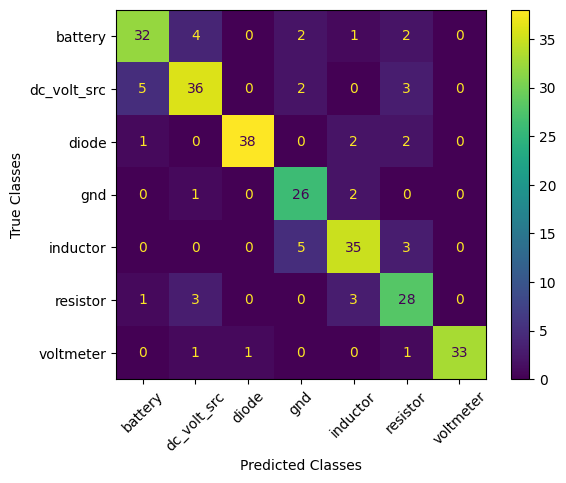

Accuracy:  0.8351648351648352
F-measure:  0.8368242919658228
Precision:  0.8385187348642499
Recall:  0.8391413299913532
Training Time:  0.0015251636505126953
Test Time:  0.1073300838470459





Kfold 2


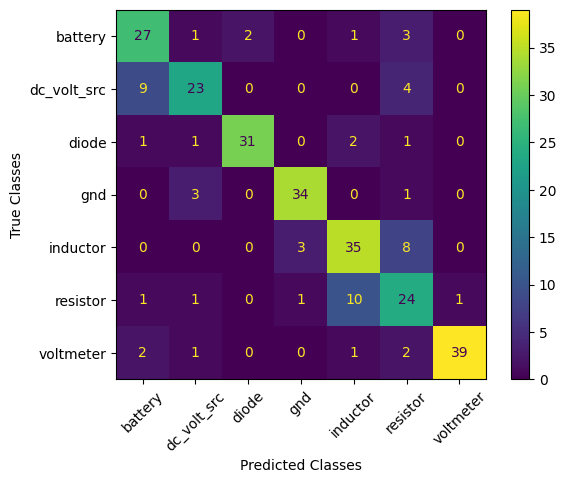

Accuracy:  0.7802197802197802
F-measure:  0.7810098214459502
Precision:  0.7890318139050435
Recall:  0.7782813812023665
Training Time:  0.0013992786407470703
Test Time:  0.10270404815673828





Kfold 3


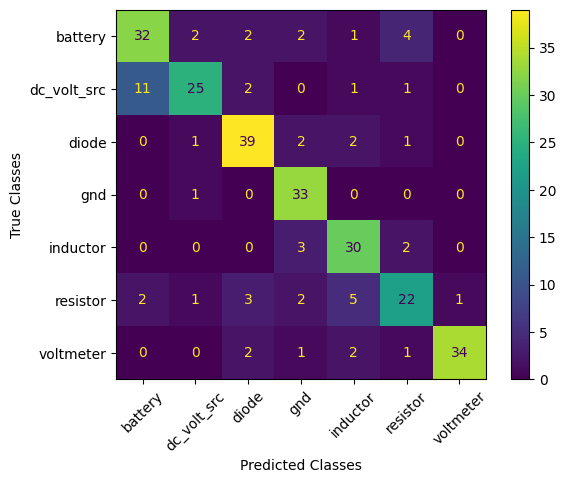

Accuracy:  0.7875457875457875
F-measure:  0.7843239635583278
Precision:  0.7910285161094489
Recall:  0.7892421309609114
Training Time:  0.0013530254364013672
Test Time:  0.08835721015930176





Kfold 4


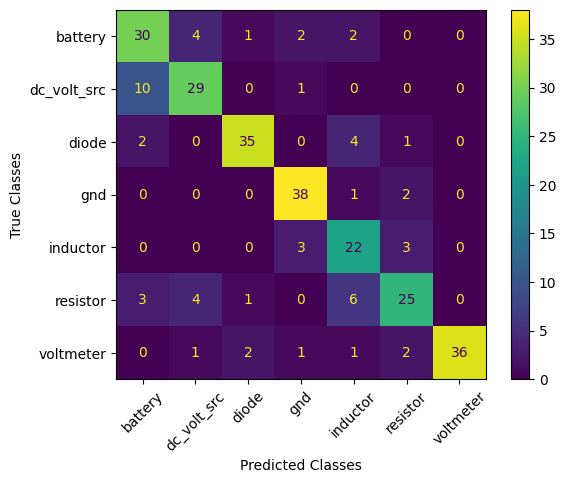

Accuracy:  0.7904411764705882
F-measure:  0.7855901097828498
Precision:  0.79148453885296
Recall:  0.7883346571317562
Training Time:  0.0012717247009277344
Test Time:  0.06934833526611328





Kfold 5


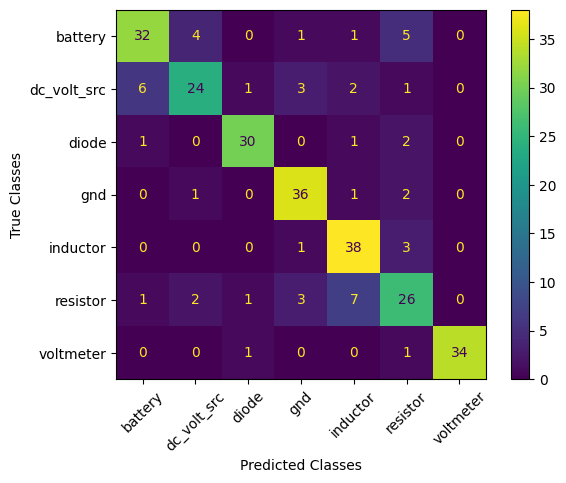

Accuracy:  0.8088235294117647
F-measure:  0.8110210662062062
Precision:  0.8159237536656893
Recall:  0.8106277122204425
Training Time:  0.0011792182922363281
Test Time:  0.07118344306945801





--------------------------------------------------------------------------------------------------------------------------------------
Average Accuracy:  0.8004390217625511
Average F-measure:  0.7997538505918314
Average Precision:  0.8051974714794783
Average Recall:  0.8011254423013661
Average Training Time:  0.001345682144165039
Average Test Time:  0.08778462409973145
--------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

avg_accuracy = 0
avg_f_measure = 0
avg_precision = 0
avg_recall = 0
avg_training_time = 0
avg_test_time = 0

print("K=7, Metric=Cosine")
print('--------------------------------------------------------------------------------------------------------------------------------------\n')
i = 1
for train, test in kf.split(all_images):
  print(f'Kfold {i}')
  i += 1
  # Training ve test kümeleri
  train_images, train_classes = np.array(all_images)[train], np.array(all_classes)[train]
  test_images, test_classes = np.array(all_images)[test], np.array(all_classes)[test]

  knn = KNeighborsClassifier(n_neighbors=7, metric='cosine')

  start_time = time.time()
  knn.fit(train_images, train_classes)
  training_time = time.time() - start_time

  start_time = time.time()
  predictions = knn.predict(test_images)
  test_time = time.time() - start_time

  # Karmaşıklık matrisinin çizimi
  cm = metrics.confusion_matrix(test_classes, predictions)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  cm_display.plot()
  plt.xticks(rotation=45)
  plt.xlabel('Predicted Classes')
  plt.ylabel('True Classes')
  plt.show()

  accuracy = metrics.accuracy_score(test_classes, predictions)
  f_measure = metrics.f1_score(test_classes, predictions, average='macro')
  precision = metrics.precision_score(test_classes, predictions, average='macro')
  recall = metrics.recall_score(test_classes, predictions, average='macro')

  avg_accuracy += accuracy
  avg_f_measure += f_measure
  avg_precision += precision
  avg_recall += recall
  avg_training_time += training_time
  avg_test_time += test_time

  print("Accuracy: ", accuracy)
  print("F-measure: ", f_measure)
  print("Precision: ", precision)
  print("Recall: ", recall)
  print("Training Time: ", training_time)
  print("Test Time: ", test_time)

  print("\n\n\n\n")

avg_accuracy /= kf.n_splits
avg_f_measure /= kf.n_splits
avg_precision /= kf.n_splits
avg_recall /= kf.n_splits
avg_training_time /= kf.n_splits
avg_test_time /= kf.n_splits

print('--------------------------------------------------------------------------------------------------------------------------------------')
print("Average Accuracy: ", avg_accuracy)
print("Average F-measure: ", avg_f_measure)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print("Average Training Time: ", avg_training_time)
print("Average Test Time: ", avg_test_time)
print('--------------------------------------------------------------------------------------------------------------------------------------')

Decision Tree Entropy

Decision Tree Entropy
--------------------------------------------------------------------------------------------------------------------------------------

Kfold 1


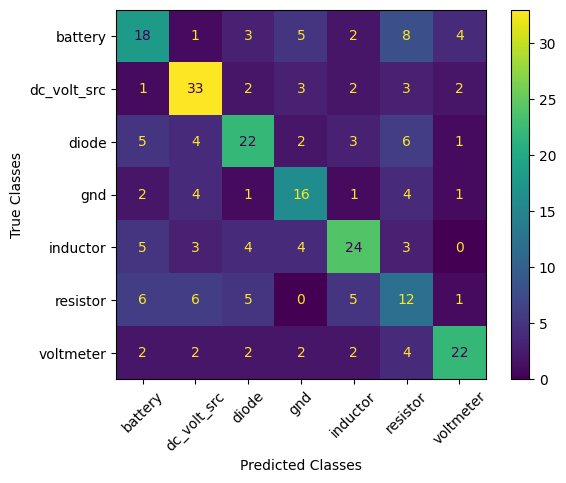

Accuracy:  0.5384615384615384
F-measure:  0.5342749240033908
Precision:  0.539049224259206
Recall:  0.5331250754787832
Training Time:  0.07259559631347656
Test Time:  0.0008676052093505859





Kfold 2


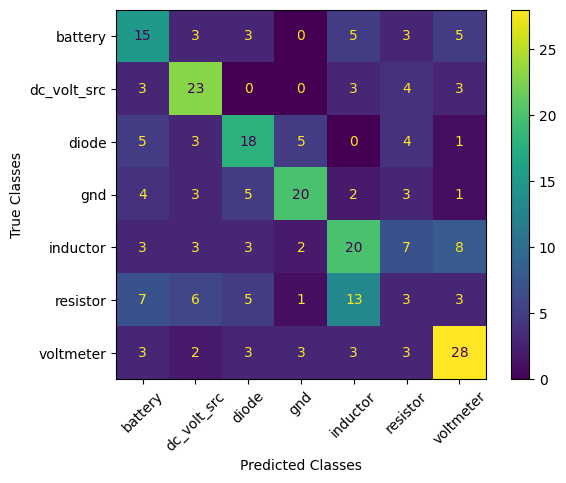

Accuracy:  0.4652014652014652
F-measure:  0.45476852830450215
Precision:  0.4512648269963764
Recall:  0.4631904783271051
Training Time:  0.07271981239318848
Test Time:  0.000774383544921875





Kfold 3


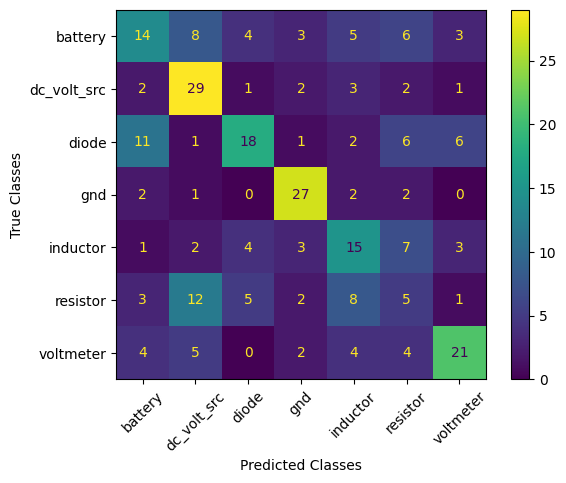

Accuracy:  0.4725274725274725
F-measure:  0.4645090229844131
Precision:  0.46524910899910904
Recall:  0.4767370514097111
Training Time:  0.10894536972045898
Test Time:  0.0011301040649414062





Kfold 4


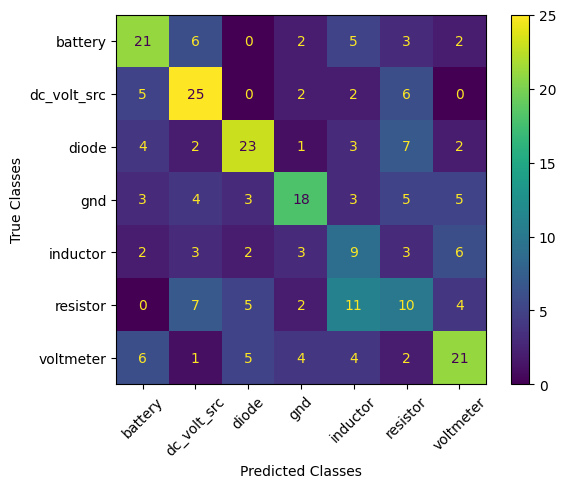

Accuracy:  0.46691176470588236
F-measure:  0.4587066204412301
Precision:  0.4638303763143301
Recall:  0.45947369959808176
Training Time:  0.1290123462677002
Test Time:  0.0010497570037841797





Kfold 5


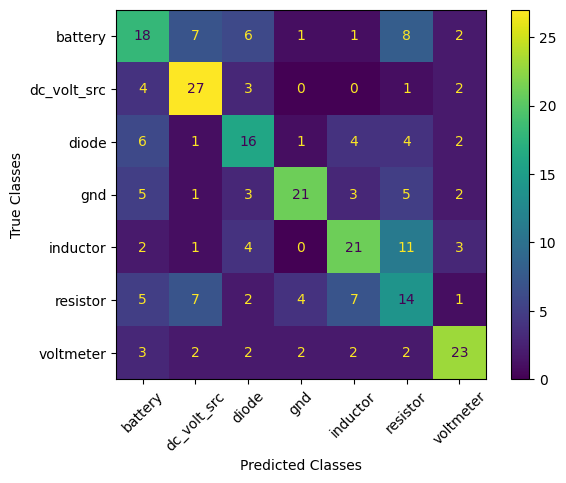

Accuracy:  0.5147058823529411
F-measure:  0.519620665538237
Precision:  0.5278612993688836
Recall:  0.5189730721536467
Training Time:  0.1220240592956543
Test Time:  0.0011107921600341797







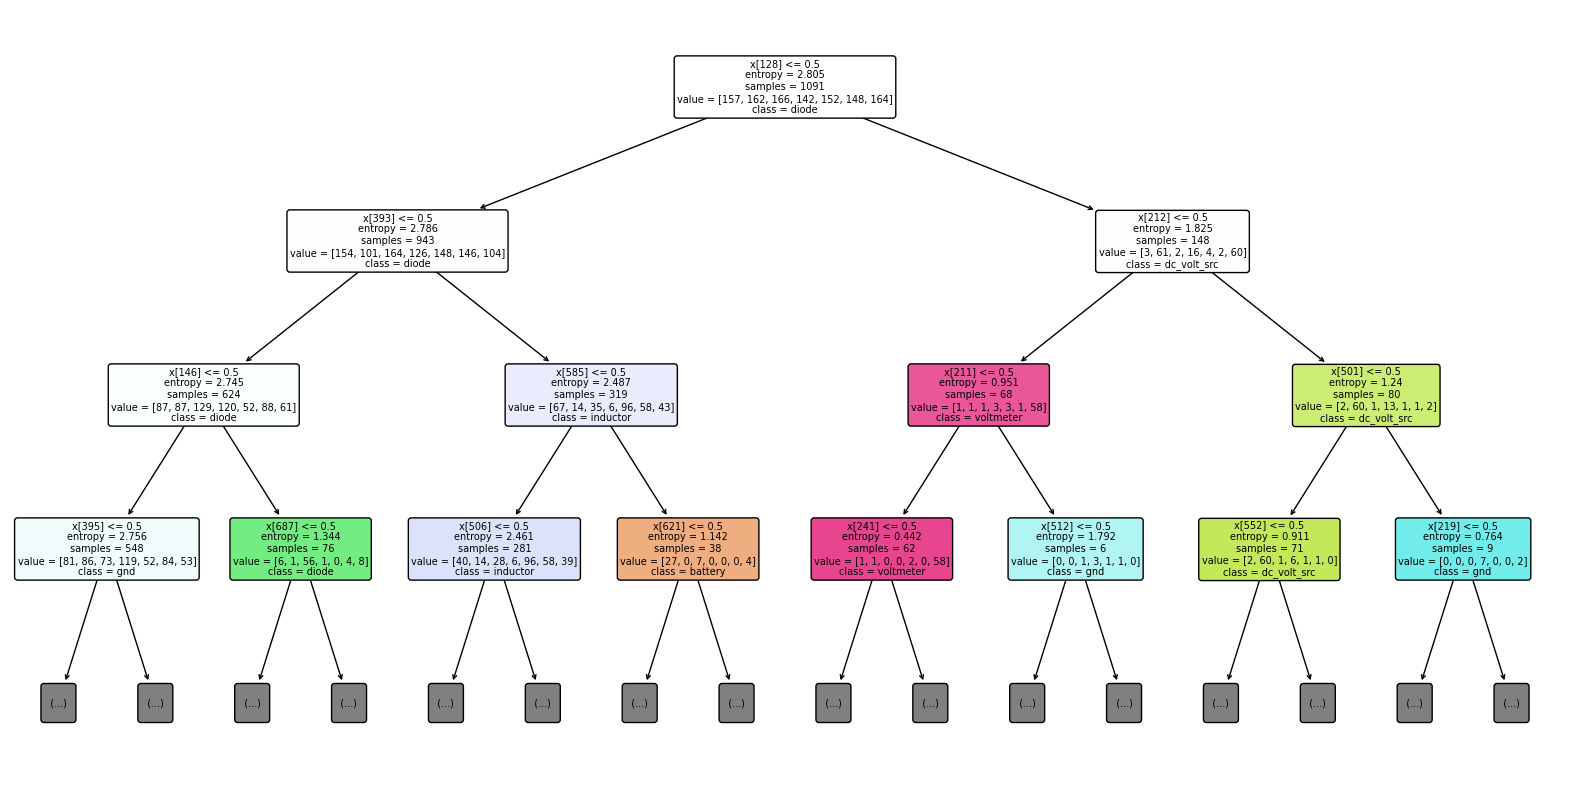

--------------------------------------------------------------------------------------------------------------------------------------
Average Accuracy:  0.4915616246498599
Average F-measure:  0.4863759522543547
Average Precision:  0.489450967187581
Average Recall:  0.49029987539346553
Average Training Time:  0.1010594367980957
Average Test Time:  0.0009865283966064454
--------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import time

avg_accuracy = 0
avg_f_measure = 0
avg_precision = 0
avg_recall = 0
avg_training_time = 0
avg_test_time = 0

print("Decision Tree Entropy")
print('--------------------------------------------------------------------------------------------------------------------------------------\n')
i = 1
for train, test in kf.split(all_images):
  print(f'Kfold {i}')
  i += 1
  # Training ve test kümeleri
  train_images, train_classes = np.array(all_images)[train], np.array(all_classes)[train]
  test_images, test_classes = np.array(all_images)[test], np.array(all_classes)[test]

  # Decision treenin oluşturulması ve tahminlerin alınması
  dt = DecisionTreeClassifier(criterion='entropy')

  start_time = time.time()
  dt.fit(train_images, train_classes)
  training_time = time.time() - start_time

  start_time = time.time()
  predictions = dt.predict(test_images)
  test_time = time.time() - start_time


  # Karmaşıklık matrisinin çizimi
  cm = metrics.confusion_matrix(test_classes, predictions)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  cm_display.plot()
  plt.xticks(rotation=45)
  plt.xlabel('Predicted Classes')
  plt.ylabel('True Classes')
  plt.show()

  accuracy = metrics.accuracy_score(test_classes, predictions)
  f_measure = metrics.f1_score(test_classes, predictions, average='macro')
  precision = metrics.precision_score(test_classes, predictions, average='macro')
  recall = metrics.recall_score(test_classes, predictions, average='macro')

  avg_accuracy += accuracy
  avg_f_measure += f_measure
  avg_precision += precision
  avg_recall += recall
  avg_training_time += training_time
  avg_test_time += test_time

  print("Accuracy: ", accuracy)
  print("F-measure: ", f_measure)
  print("Precision: ", precision)
  print("Recall: ", recall)
  print("Training Time: ", training_time)
  print("Test Time: ", test_time)

  print("\n\n\n\n")

avg_accuracy /= kf.n_splits
avg_f_measure /= kf.n_splits
avg_precision /= kf.n_splits
avg_recall /= kf.n_splits
avg_training_time /= kf.n_splits
avg_test_time /= kf.n_splits

# Son ağacın çizimi
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, rounded=True, class_names=classes, max_depth=3, fontsize=7)
plt.show()

print('--------------------------------------------------------------------------------------------------------------------------------------')
print("Average Accuracy: ", avg_accuracy)
print("Average F-measure: ", avg_f_measure)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print("Average Training Time: ", avg_training_time)
print("Average Test Time: ", avg_test_time)
print('--------------------------------------------------------------------------------------------------------------------------------------')


Decision Tree Gini

Decision Tree Gini
--------------------------------------------------------------------------------------------------------------------------------------

Kfold 1


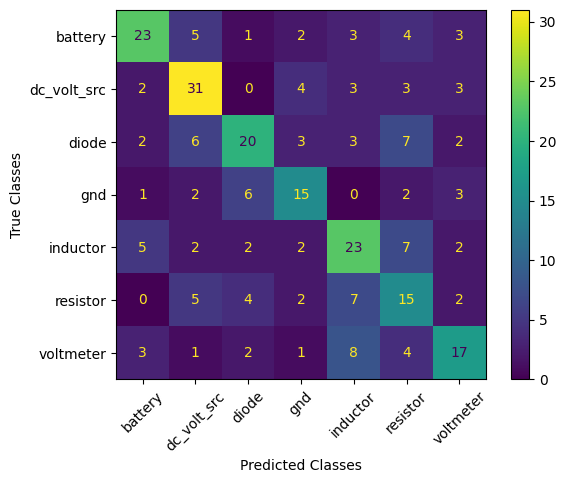

Accuracy:  0.5274725274725275
F-measure:  0.5229770073542065
Precision:  0.5287810350074527
Recall:  0.5218462404769076
Training Time:  0.06909394264221191
Test Time:  0.0008168220520019531





Kfold 2


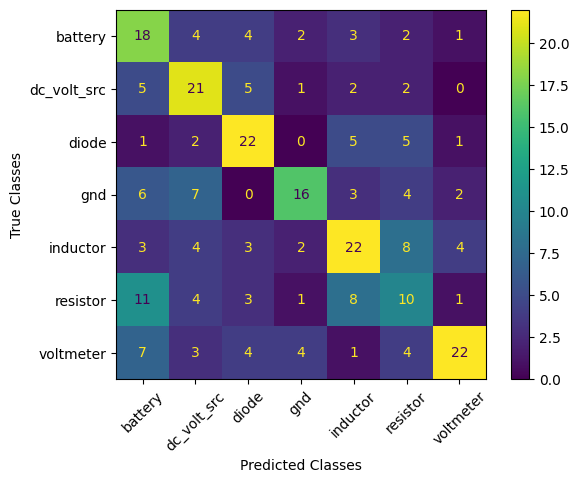

Accuracy:  0.47985347985347987
F-measure:  0.4793264802516376
Precision:  0.49528136134923617
Recall:  0.4821737848457461
Training Time:  0.06923580169677734
Test Time:  0.0007967948913574219





Kfold 3


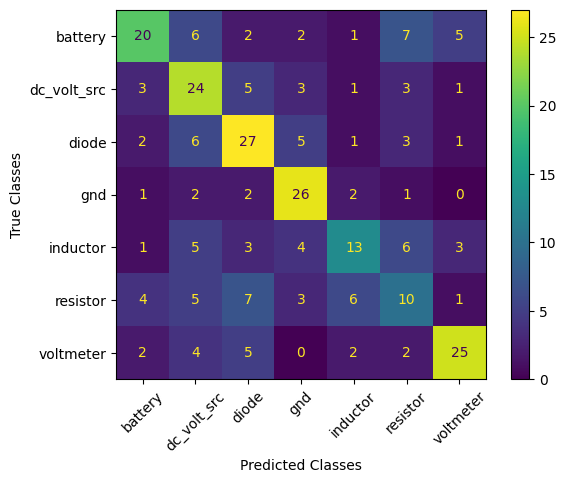

Accuracy:  0.5311355311355311
F-measure:  0.5234459267615418
Precision:  0.5298009199342989
Recall:  0.5291469300898654
Training Time:  0.07372069358825684
Test Time:  0.0011930465698242188





Kfold 4


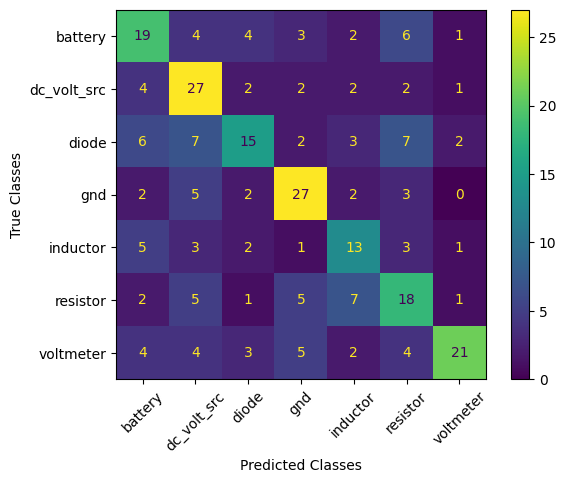

Accuracy:  0.5147058823529411
F-measure:  0.5096716284940148
Precision:  0.5251812414643763
Recall:  0.5131507426479471
Training Time:  0.0677635669708252
Test Time:  0.0007977485656738281





Kfold 5


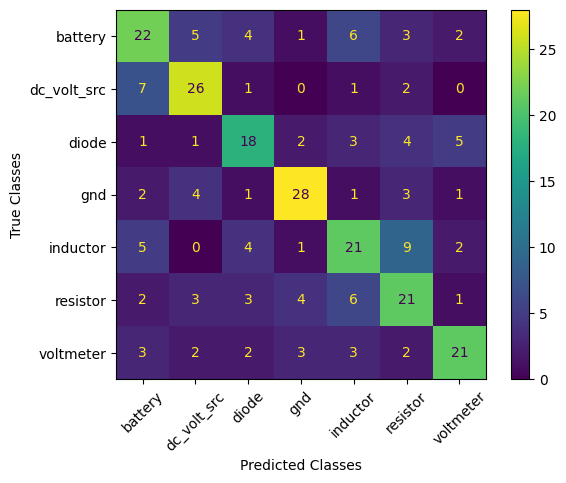

Accuracy:  0.5772058823529411
F-measure:  0.5791655818612513
Precision:  0.5810109968428784
Recall:  0.5788679582455233
Training Time:  0.07781767845153809
Test Time:  0.0008404254913330078







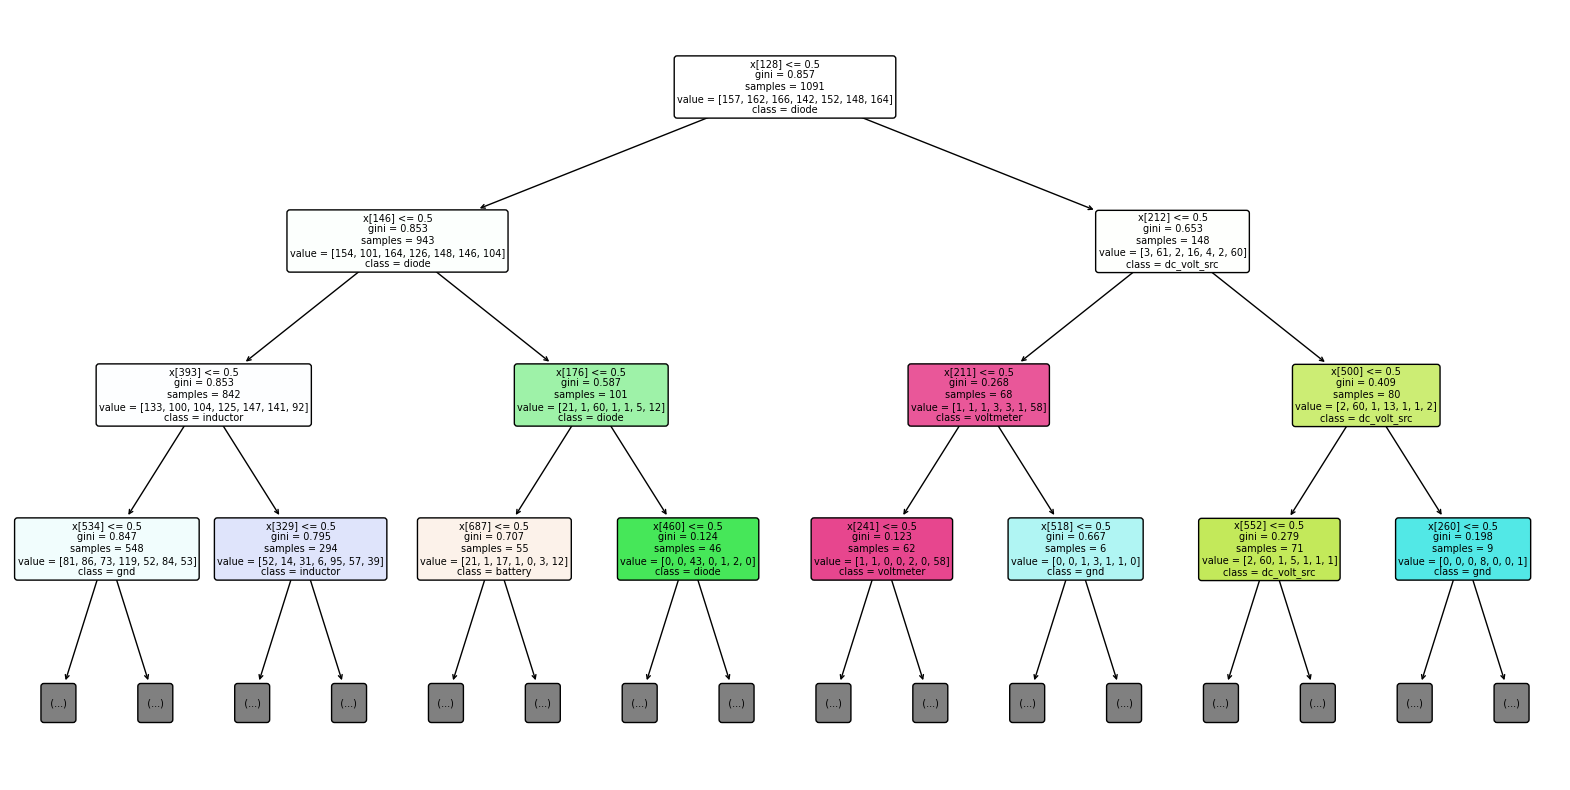

--------------------------------------------------------------------------------------------------------------------------------------
Average Accuracy:  0.5260746606334841
Average F-measure:  0.5229173249445305
Average Precision:  0.5320111109196486
Average Recall:  0.5250371312611979
Average Training Time:  0.07152633666992188
Average Test Time:  0.0008889675140380859
--------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

avg_accuracy = 0
avg_f_measure = 0
avg_precision = 0
avg_recall = 0
avg_training_time = 0
avg_test_time = 0

print("Decision Tree Gini")
print('--------------------------------------------------------------------------------------------------------------------------------------\n')
i = 1
for train, test in kf.split(all_images):
  print(f'Kfold {i}')
  i += 1
  # Training ve test kümeleri
  train_images, train_classes = np.array(all_images)[train], np.array(all_classes)[train]
  test_images, test_classes = np.array(all_images)[test], np.array(all_classes)[test]

  # Decision treenin oluşturulması ve tahminlerin alınması
  dt = DecisionTreeClassifier(criterion='gini')

  start_time = time.time()
  dt.fit(train_images, train_classes)
  training_time = time.time() - start_time

  start_time = time.time()
  predictions = dt.predict(test_images)
  test_time = time.time() - start_time


  # Karmaşıklık matrisinin çizimi
  cm = metrics.confusion_matrix(test_classes, predictions)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  cm_display.plot()
  plt.xticks(rotation=45)
  plt.xlabel('Predicted Classes')
  plt.ylabel('True Classes')
  plt.show()

  accuracy = metrics.accuracy_score(test_classes, predictions)
  f_measure = metrics.f1_score(test_classes, predictions, average='macro')
  precision = metrics.precision_score(test_classes, predictions, average='macro')
  recall = metrics.recall_score(test_classes, predictions, average='macro')

  avg_accuracy += accuracy
  avg_f_measure += f_measure
  avg_precision += precision
  avg_recall += recall
  avg_training_time += training_time
  avg_test_time += test_time

  print("Accuracy: ", accuracy)
  print("F-measure: ", f_measure)
  print("Precision: ", precision)
  print("Recall: ", recall)
  print("Training Time: ", training_time)
  print("Test Time: ", test_time)

  print("\n\n\n\n")

avg_accuracy /= kf.n_splits
avg_f_measure /= kf.n_splits
avg_precision /= kf.n_splits
avg_recall /= kf.n_splits
avg_training_time /= kf.n_splits
avg_test_time /= kf.n_splits

# Son ağacın çizimi
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, rounded=True, class_names=classes, max_depth=3, fontsize=7)
plt.show()

print('--------------------------------------------------------------------------------------------------------------------------------------')
print("Average Accuracy: ", avg_accuracy)
print("Average F-measure: ", avg_f_measure)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print("Average Training Time: ", avg_training_time)
print("Average Test Time: ", avg_test_time)
print('--------------------------------------------------------------------------------------------------------------------------------------')


Naive Bayes

Naive Bayes
--------------------------------------------------------------------------------------------------------------------------------------

Kfold 1


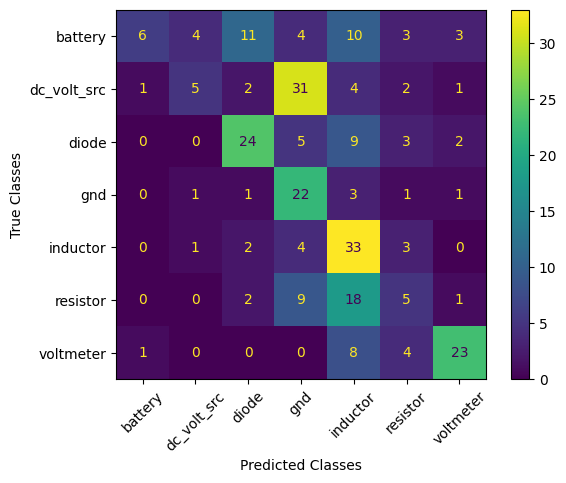

Accuracy:  0.43223443223443225
F-measure:  0.39841185055075695
Precision:  0.4910819107701731
Recall:  0.44585503319122693
Training Time:  0.013316154479980469
Test Time:  0.00675654411315918





Kfold 2


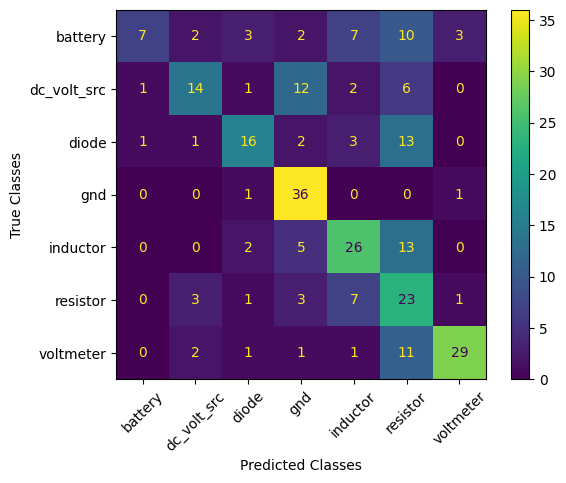

Accuracy:  0.5531135531135531
F-measure:  0.5375866122385273
Precision:  0.6235850707557068
Recall:  0.5430727287100957
Training Time:  0.011799335479736328
Test Time:  0.006623268127441406





Kfold 3


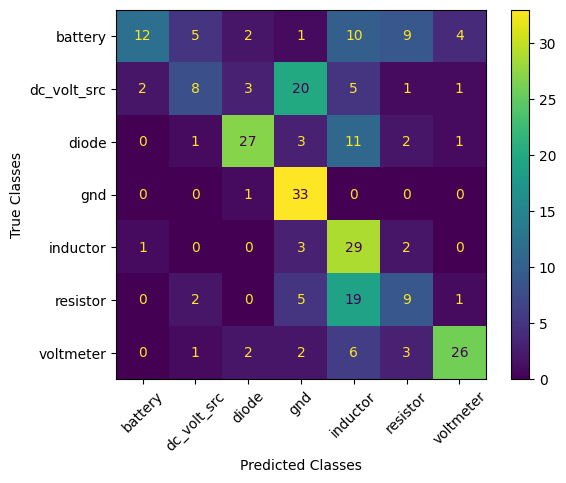

Accuracy:  0.5274725274725275
F-measure:  0.5042799111749
Precision:  0.5758695363125941
Recall:  0.5397470616153438
Training Time:  0.011803627014160156
Test Time:  0.006586551666259766





Kfold 4


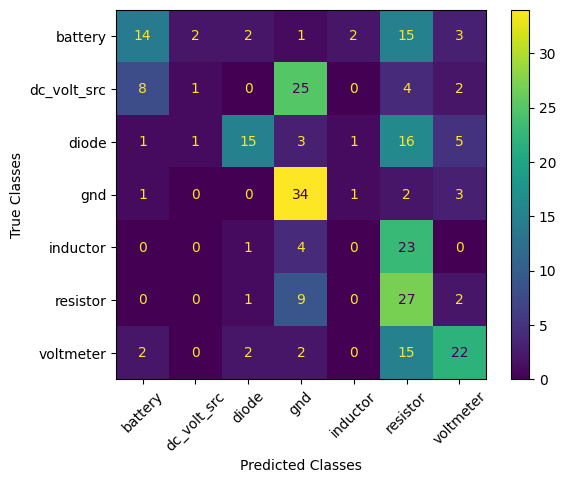

Accuracy:  0.41544117647058826
F-measure:  0.35097450674958275
Precision:  0.39970645222746065
Recall:  0.3963315868692256
Training Time:  0.012397050857543945
Test Time:  0.006239652633666992





Kfold 5


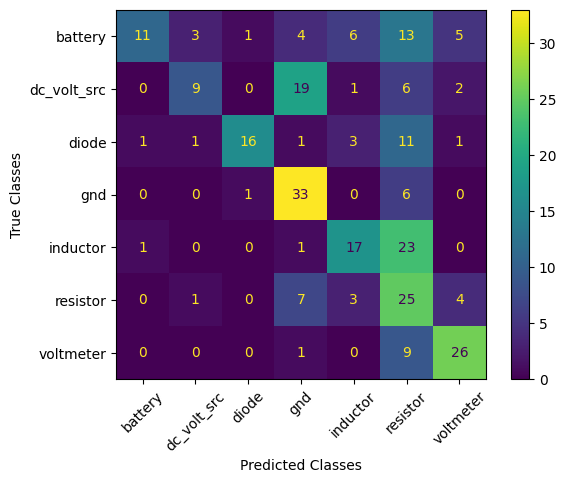

Accuracy:  0.5036764705882353
F-measure:  0.5049556026707563
Precision:  0.6282277535976298
Recall:  0.5066613655728371
Training Time:  0.01179957389831543
Test Time:  0.00652766227722168





--------------------------------------------------------------------------------------------------------------------------------------
Average Accuracy:  0.4863876319758672
Average F-measure:  0.4592416966769046
Average Precision:  0.5436941447327129
Average Recall:  0.48633355519174587
Average Training Time:  0.012223148345947265
Average Test Time:  0.006546735763549805
--------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

avg_accuracy = 0
avg_f_measure = 0
avg_precision = 0
avg_recall = 0
avg_training_time = 0
avg_test_time = 0

print("Naive Bayes")
print('--------------------------------------------------------------------------------------------------------------------------------------\n')
i = 1
for train, test in kf.split(all_images):
  print(f'Kfold {i}')
  i += 1
  # Training ve test kümeleri
  train_images, train_classes = np.array(all_images)[train], np.array(all_classes)[train]
  test_images, test_classes = np.array(all_images)[test], np.array(all_classes)[test]

  # Naive Bayesin oluşturulması ve tahminlerin alınması
  bayes = GaussianNB()

  start_time = time.time()
  bayes.fit(train_images, train_classes)
  training_time = time.time() - start_time

  start_time = time.time()
  predictions = bayes.predict(test_images)
  test_time = time.time() - start_time

  # Karmaşıklık matrisinin çizimi
  cm = metrics.confusion_matrix(test_classes, predictions)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  cm_display.plot()
  plt.xticks(rotation=45)
  plt.xlabel('Predicted Classes')
  plt.ylabel('True Classes')
  plt.show()

  accuracy = metrics.accuracy_score(test_classes, predictions)
  f_measure = metrics.f1_score(test_classes, predictions, average='macro')
  precision = metrics.precision_score(test_classes, predictions, average='macro')
  recall = metrics.recall_score(test_classes, predictions, average='macro')

  avg_accuracy += accuracy
  avg_f_measure += f_measure
  avg_precision += precision
  avg_recall += recall
  avg_training_time += training_time
  avg_test_time += test_time

  print("Accuracy: ", accuracy)
  print("F-measure: ", f_measure)
  print("Precision: ", precision)
  print("Recall: ", recall)
  print("Training Time: ", training_time)
  print("Test Time: ", test_time)

  print("\n\n\n\n")

avg_accuracy /= kf.n_splits
avg_f_measure /= kf.n_splits
avg_precision /= kf.n_splits
avg_recall /= kf.n_splits
avg_training_time /= kf.n_splits
avg_test_time /= kf.n_splits

print('--------------------------------------------------------------------------------------------------------------------------------------')
print("Average Accuracy: ", avg_accuracy)
print("Average F-measure: ", avg_f_measure)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print("Average Training Time: ", avg_training_time)
print("Average Test Time: ", avg_test_time)
print('--------------------------------------------------------------------------------------------------------------------------------------')

SVM

SVM
--------------------------------------------------------------------------------------------------------------------------------------

Kfold 1


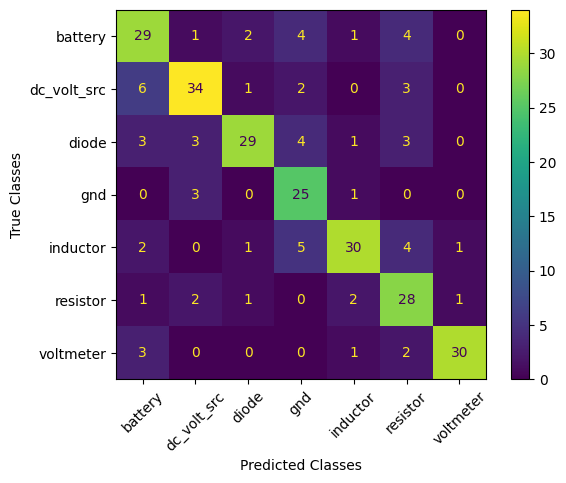

Accuracy:  0.7509157509157509
F-measure:  0.7535699558512982
Precision:  0.7621323899538675
Recall:  0.7591346900085326
Training Time:  0.5351085662841797
Test Time:  0.19675397872924805





Kfold 2


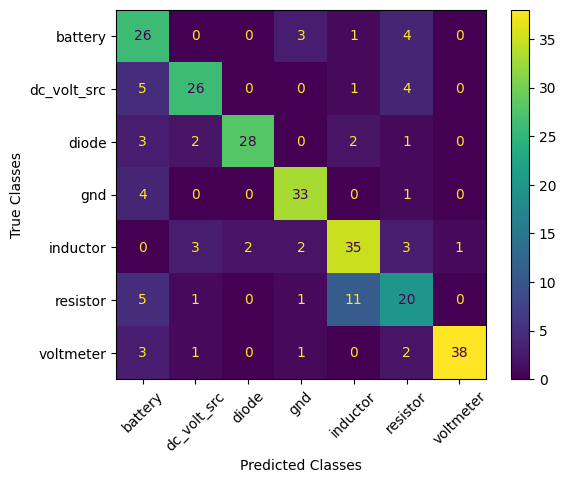

Accuracy:  0.7545787545787546
F-measure:  0.7543050942789308
Precision:  0.7653167226148593
Recall:  0.7521081048742914
Training Time:  0.551804780960083
Test Time:  0.18847012519836426





Kfold 3


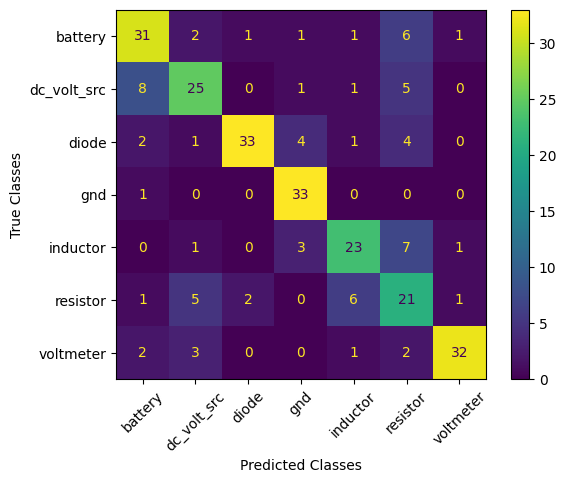

Accuracy:  0.7252747252747253
F-measure:  0.726493487347092
Precision:  0.7349810849810849
Recall:  0.7271897130945401
Training Time:  0.5323576927185059
Test Time:  0.16263890266418457





Kfold 4


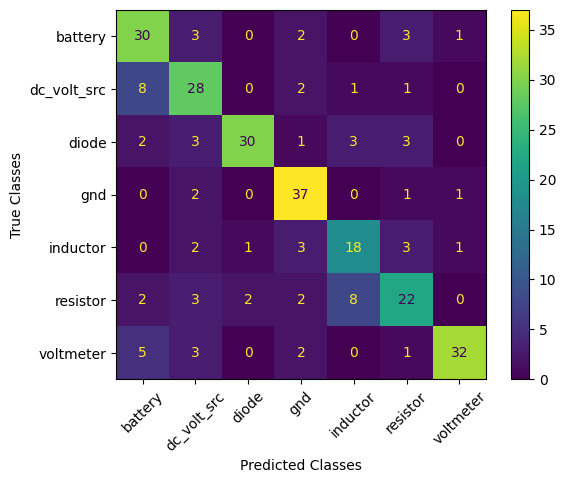

Accuracy:  0.7242647058823529
F-measure:  0.7186436441723102
Precision:  0.7285998566323463
Recall:  0.7195858944825803
Training Time:  0.5101051330566406
Test Time:  0.16618609428405762





Kfold 5


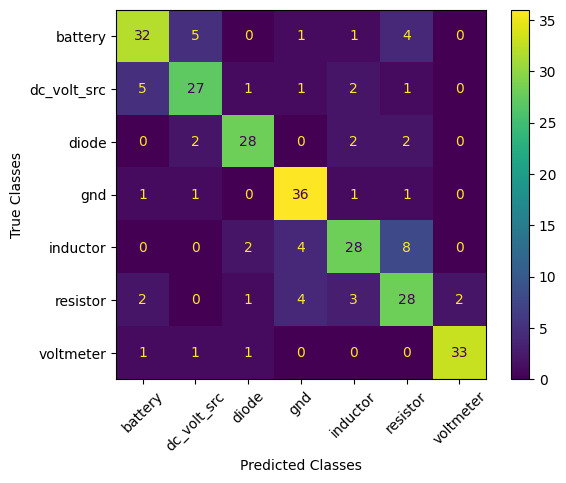

Accuracy:  0.7794117647058824
F-measure:  0.7828236968712945
Precision:  0.785365554998944
Recall:  0.7829683601913425
Training Time:  0.540013313293457
Test Time:  0.15369868278503418





--------------------------------------------------------------------------------------------------------------------------------------
Average Accuracy:  0.7468891402714932
Average F-measure:  0.7471671757041851
Average Precision:  0.7552791218362204
Average Recall:  0.7481973525302574
Average Training Time:  0.5338778972625733
Average Test Time:  0.17354955673217773
--------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

classifier = SVC()

avg_accuracy = 0
avg_f_measure = 0
avg_precision = 0
avg_recall = 0
avg_training_time = 0
avg_test_time = 0

print("SVM")
print('--------------------------------------------------------------------------------------------------------------------------------------\n')
i = 1
for train, test in kf.split(all_images):
  print(f'Kfold {i}')
  i += 1
  # Training ve test kümeleri
  train_images, train_classes = np.array(all_images)[train], np.array(all_classes)[train]
  test_images, test_classes = np.array(all_images)[test], np.array(all_classes)[test]

  start_time = time.time()
  classifier.fit(train_images, train_classes)
  training_time = time.time() - start_time

  start_time = time.time()
  predictions = classifier.predict(test_images)
  test_time = time.time() - start_time

  # Karmaşıklık matrisinin çizimi
  cm = metrics.confusion_matrix(test_classes, predictions)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  cm_display.plot()
  plt.xticks(rotation=45)
  plt.xlabel('Predicted Classes')
  plt.ylabel('True Classes')
  plt.show()

  accuracy = metrics.accuracy_score(test_classes, predictions)
  f_measure = metrics.f1_score(test_classes, predictions, average='macro')
  precision = metrics.precision_score(test_classes, predictions, average='macro')
  recall = metrics.recall_score(test_classes, predictions, average='macro')

  avg_accuracy += accuracy
  avg_f_measure += f_measure
  avg_precision += precision
  avg_recall += recall
  avg_training_time += training_time
  avg_test_time += test_time

  print("Accuracy: ", accuracy)
  print("F-measure: ", f_measure)
  print("Precision: ", precision)
  print("Recall: ", recall)
  print("Training Time: ", training_time)
  print("Test Time: ", test_time)

  print("\n\n\n\n")

avg_accuracy /= kf.n_splits
avg_f_measure /= kf.n_splits
avg_precision /= kf.n_splits
avg_recall /= kf.n_splits
avg_training_time /= kf.n_splits
avg_test_time /= kf.n_splits

print('--------------------------------------------------------------------------------------------------------------------------------------')
print("Average Accuracy: ", avg_accuracy)
print("Average F-measure: ", avg_f_measure)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print("Average Training Time: ", avg_training_time)
print("Average Test Time: ", avg_test_time)
print('--------------------------------------------------------------------------------------------------------------------------------------')